In [71]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.preprocessing import scale
%matplotlib inline  

# Lee dataset

In [2]:
lista_attr = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        line.strip()
        initia = line.find('[')
        lista_list = [float(x) for x in line[initia + 1: -2].split(', ')]
        lista_attr.append(lista_list)


# PCA

In [3]:
X = np.array(lista_attr)
pca = PCA(n_components = 50)
X_new = pca.fit_transform(X) 

In [ ]:
print(pca.explained_variance_ratio_)
print(X_new.shape)
print(X_new)

In [4]:
X_backup = X_new

# KMeans

In [5]:
k1 = 10
k2 = 20
k3 = 30
klist = [k1,k2,k3]
labels = []
centroids = []
silavg = []
for k in klist :
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_new)
    cluster_labels = kmeans.labels_
    labels += [cluster_labels]
    centroids += [kmeans.cluster_centers_]
    silhouette_avg = silhouette_score(X_new, cluster_labels, metric='euclidean')
    print(silhouette_avg)
    print(metrics.calinski_harabaz_score(X_new, cluster_labels))
#Silhoutte Score 

0.048454828414
193.199299802
0.0553427306258
126.914466709
0.0495759254166
97.8133391915


In [ ]:
#Plot de cada K
n = 0
for k in klist :
    for i in range(k):
        # select only data observations with cluster label == i
        ds = X_new[np.where(labels[n]==i)]
        # plot the data observations
        plt.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = plt.plot(centroids[n][i,0],centroids[n][i,1],'kx')
        # make the centroid x's bigger
        plt.setp(lines,ms=15.0)
        plt.setp(lines,mew=2.0)
    n += 1
    plt.show()

In [ ]:
for cen in labels:
    c = 0
    for cent in cen:
        c+=1
    print(c)
print(labels)
print(centroids)

# MeanShift

In [6]:
bandwidth = estimate_bandwidth(X_new)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X_new)
labels_ms = ms.labels_
cluster_centers_ms = ms.cluster_centers_
n_clusters_ = labels_ms.max()+1
print(n_clusters_)
print(labels_ms)
print(bandwidth)

12
[0 0 0 ..., 0 0 0]
369.441136893


In [7]:
silhouette_avg = silhouette_score(X_new, labels_ms)
print(silhouette_avg)
print(metrics.calinski_harabaz_score(X_new, labels_ms))

0.213508571466
14.3180203805


IndexError: index 12 is out of bounds for axis 0 with size 12

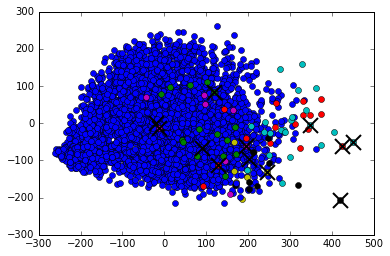

In [26]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = X_new[np.where(labels_ms==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(cluster_centers_ms[i,0],cluster_centers_ms[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

# DBSCAN

In [54]:
#db = DBSCAN(eps = 100, min_samples = 4,n_jobs=-1).fit(X_new)
#db1 = DBSCAN(eps = 270, min_samples = 3,n_jobs=-1).fit(X_new)
db2 = DBSCAN(eps = 240, min_samples = 5,n_jobs=-1).fit(X_new)
#dblabels = db.labels_
#dblabels1 = db1.labels_
dblabels2 = db2.labels_

#n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
#n_clusters_1 = len(set(dblabels1)) - (1 if -1 in dblabels1 else 0)
n_clusters_2 = len(set(dblabels2)) - (1 if -1 in dblabels2 else 0)

#print('Estimated number of clusters: %d' % n_clusters_)
#print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of clusters: %d' % n_clusters_2)

Estimated number of clusters: 6


In [52]:
#print(silhouette_score(X_new, dblabels))
#print(silhouette_score(X_new, dblabels1))
print(silhouette_score(X_new, dblabels2))
#print(metrics.calinski_harabaz_score(X_new, dblabels))
#print(metrics.calinski_harabaz_score(X_new, dblabels1))
print(metrics.calinski_harabaz_score(X_new, dblabels2))

0.0356645520038
56.9861855197


In [55]:
np.set_printoptions(threshold=np.inf)
#print(dblabels)
#print(dblabels1)
print(dblabels2)

[-1  0 -1  0  0  0 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0 -1  0  0 -1 -1 -1
 -1  0  0  0 -1  0 -1 -1  0  0  0  0 -1  0  0  0 -1  0  0 -1  0  0  0  0  0
  0 -1  0  0 -1 -1 -1  0 -1  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1  0  0 -1
  0  0  0 -1 -1  0 -1 -1 -1 -1  0 -1  0  0  0  0  0 -1 -1  0  0  0 -1 -1 -1
 -1 -1  0 -1  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0 -1 -1 -1  0  0 -1  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0 -1  0 -1 -1  0
 -1 -1  0  0 -1 -1 -1 -1  0  0  0 -1  0  0  0 -1  0  0 -1  0  0 -1  0  0  0
  0  0 -1 -1  0  0 -1  0  0  0 -1  0  0 -1  0  0 -1  0  0 -1 -1 -1  0 -1  0
  0 -1  0 -1  0 -1 -1  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1
 -1 -1  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
 -1  0  0 -1  0  0 -1  0 -1  0  0 -1  0  0  0 -1 -1 -1  0  0  0  0  0  0  0
 -1  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0

In [10]:
X_backup = X_new

In [20]:
modelo = TSNE(n_components = 2, perplexity = 50,early_exaggeration=15,n_iter=5000)
np.set_printoptions(suppress=True)
t_sne=modelo.fit_transform(X_backup)

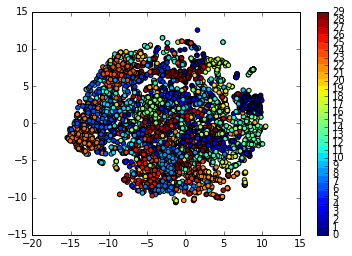

In [15]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("jet", 30))
plt.colorbar(ticks=range(30))
plt.show()
#50-25

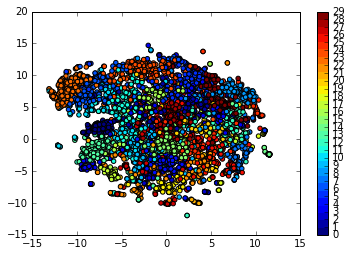

In [17]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("jet", 30))
plt.colorbar(ticks=range(30))
plt.show()
#50-20

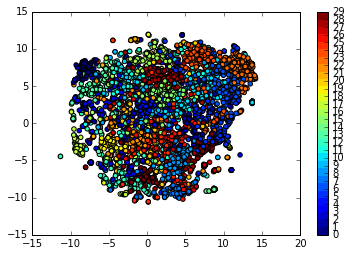

In [19]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("jet", 30))
plt.colorbar(ticks=range(30))
plt.show()
#50-15

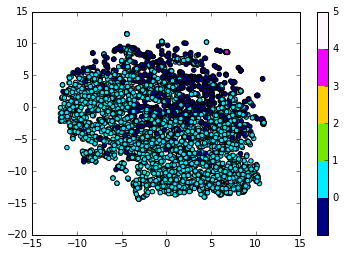

In [58]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=dblabels2, cmap=plt.cm.get_cmap("gist_ncar", 6))
plt.colorbar(ticks=range(30))
plt.show()
#50-15-5000

In [ ]:
print(t_sne)

# T-SNE

In [ ]:
for i in t_sne:
    plt.scatter(i[0], i[1])

# CSV

In [72]:
ids = []
path = []
thumbs_path = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        id_start = line.find('/', 3)
        id_end = line.find('.', 3)
        actual_id = line[id_start+1:id_end]
        ids.append(int(actual_id))
        path.append('img/' + str(line[id_start+1:id_end]) + '.jpg')
        thumbs_path.append('img/thumb/' + str(line[id_start+1:id_end]) + '.jpg')
        
x = []
y = []
clases = []
t_sne_scaled = scale(t_sne)
for t in t_sne_scaled:
    x.append(t[0])
    y.append(t[1])

for clase in labels[2]:
    clase = str(clase)
    clases.append('Clase ' + clase)


DataSet = list(zip(ids, x, y,clases,path,thumbs_path))
df = pd.DataFrame(data = DataSet, columns=['id', 'x', 'y','class','file','thumbnail'])
df
df.to_csv('datas.csv',index=False,header=True)